
# <p style="text-align: center;">EE 461P: Data Science Principles</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 55</p>
## <p style="text-align: center;">Due: Thur, September 14, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Applications of machine learning (10 pts)

Read the [article](http://www.datasciencecentral.com/profiles/blogs/20-data-science-systems-used-by-amazon-to-operate-its-business) "21 data science systems used by Amazon to operate its business" and pick any two of the data science systems used by Amazon according to this blog.

(5 pts each) For each of these two system you have chosen:

What kind of machine learning problem is involved (e.g. classification, regression, clustering, outlier detection,...)? Speculate on what kind of data may be needed and how the results can be useful to the company.


## Answer

Item 6. Fraud detection: This is an outlier detection problem, detecting any out of the ordinary events that may be considered fraud. Good data for hacking attempts may be number of invalid requests, for credit card purchases may be total amount of order, and ID theft may be building entrance time. This data is obviously useful to the company as fraud can cause a loss in many different areas, especially PR.

Item 8. Taxonomy creation: This is a clustering problem, taking many items, and classifying them into groups of items for easier customer navigation. The easiest data to start with is metadata tags, but other information such as item description, pictures, and manufacturer information could be used. This is useful, because shoppers can see similar products in the item category they are searching for, and more options usually means a higher chance of making a sale.

###### a.)

###### b.)

# Question 2.a: Maximum likelihood estimate (10 pts)

Suppose a manager at an internet sales company wants to estimate how fast his salesperson is generating successful leads. Instead of recording the time for each lead, the time taken to generate the next 5 leads are recorded, i.e., there is one recording (denoting the elapsed time) for every 5 consecutive leads. For a specific salesperson, the time intervals recorded are {1,3,1.5,4,2,7,1.2,2,4,3.1} hours. 

A statistician suggests that if these time intervals are assumed to arise by i.i.d. sampling from the following distribution:
$$ p(t) = \frac{1}{C \times \theta^{5}}t^{4}exp^{-\frac{t}{\theta}},$$
(where C is a normalizing constant). Therefore, if $\theta$ can be estimated, then he can provide detailed information
about the lead generation process, including average rates, variances etc.

Find the Maximum Likelihood estimate for $\theta$ based on the recorded observations.


## Answer

>

# Question 2.b: Bivariate Normal Distribution (10 pts)

Suppose $X$ and $Y$ are two random variables whose joint distribution is Normal (Gaussian), centered at (0,0) and with correlation $\rho$. (See "Bivariate Case" in the Wikipedia entry for "Multivariate Normal Distribution" for the equation, or use just use the vector form given in the class notes, with $\sigma_{12} = \sigma_{21} = \rho \sigma_{x} \sigma_{y} $). Consider 2 cases:
1. $\sigma_x^2 = 16; \sigma_y^2 = 9; \rho = 0$
2. $\sigma_x^2 = 16; \sigma_y^2 = 9; \rho = 0.5$

a. (4 pts) Obtain contour plots for each of the two distributions using  Python (http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.kdeplot.html). 

b. (3 pts) View 3-D plots for the two distributions from at least two different viewing perspectives each (http://matplotlib.org/examples/mplot3d/rotate_axes3d_demo.html).

c.  (3 pts) Consider the bivariate Normal Distribution given in part (ii). We can rotate this distribution by using the rotation matrix
\begin{equation} \left[ \begin{array}{cc} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{array} \right] \end{equation}
Check Wikipedia for more info on rotation matrices. This is the same as creating two new random variables:
\begin{aligned}
U = X \cos(\theta) - Y \sin(\theta) \\
V = X \sin(\theta) + Y \cos(\theta)
\end{aligned}
For a rotation of -45 degrees, plot the rotated distribution and fit a bivariate gaussian to this rotated distribution.

## Answer


###### a.)

In [5]:
import numpy as np
import seaborn as sns
%matplotlib inline

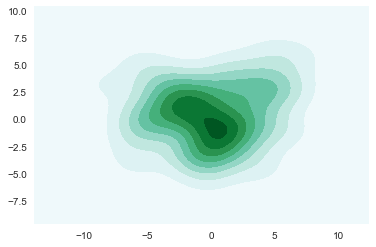

In [35]:
mean1, cov1 = [0,0], [(16,0),(0,9)]
x1, y1 = np.random.multivariate_normal(mean1, cov1, size=50).T
ax1 = sns.kdeplot(x1, y1, shade=True)
ax1

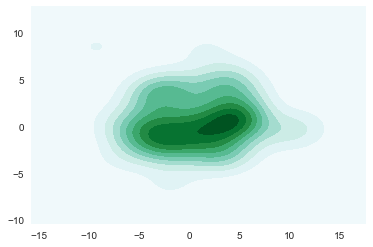

In [36]:
mean2, cov2 = [0,0], [(16,0.5),(0.5,9)];
x2, y2 = np.random.multivariate_normal(mean2, cov2, size=50).T
ax2 = sns.kdeplot(x2, y2, shade=True)
ax2

###### b.)

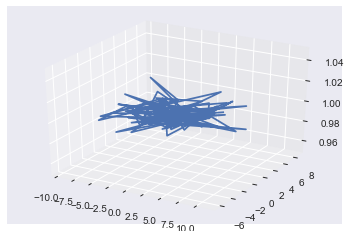

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x1, y1, 1, rstride=1, cstride=1)
ax.plot_wireframe(x2, y2, 1, rstride=1, cstride=1)

In [43]:
for angle in range(0,360):
    ax.view_init(30,angle)
    plt.draw()
    plt.pause(.001)

###### c.)

# Question 3: Multiple Linear Regression in Python (25 pts)

Use the following code to import the diabetes dataset and linear models in python.



In [45]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import numpy as np

boston = datasets.load_boston()

X = boston.data
y = boston.target

The dataset information can be found [here](http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset).

a. (3 pts) Print the shape (number of rows and columns) of the feature matrix, and print the first 5 rows.

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset (506 rows). Report the regression coefficient of each input feature and evaluate the model using mean squared error (MSE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c.  (6 pts) Split the data into a training set and a test set.  Use the first 400 rows for training set and remaining rows for test set.  Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MSE values thus obtained.

d.  (5 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.

e. (5 pts) Use the following code to add new features to the dataset.  You should have 26 variables now.  Note that this code adds one squared term for each variable; in practice one may introduce only a few terms based on domain knowledge or experimentation.  Repeat (c) and report the MSE values of the training set and the test set, respectively.

## Answer



###### a.)

In [46]:
X.shape

(506, 13)

In [47]:
X[:5,:]

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00,
          0.00000000e+00,   5.38000000e-01,   6.57500000e+00,
          6.52000000e+01,   4.09000000e+00,   1.00000000e+00,
          2.96000000e+02,   1.53000000e+01,   3.96900000e+02,
          4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00,
          0.00000000e+00,   4.69000000e-01,   6.42100000e+00,
          7.89000000e+01,   4.96710000e+00,   2.00000000e+00,
          2.42000000e+02,   1.78000000e+01,   3.96900000e+02,
          9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00,
          0.00000000e+00,   4.69000000e-01,   7.18500000e+00,
          6.11000000e+01,   4.96710000e+00,   2.00000000e+00,
          2.42000000e+02,   1.78000000e+01,   3.92830000e+02,
          4.03000000e+00],
       [  3.23700000e-02,   0.00000000e+00,   2.18000000e+00,
          0.00000000e+00,   4.58000000e-01,   6.99800000e+00,
          4.58000000e+01,   6.06220000e+00,   3.000

###### b.)

In [48]:
reg = linear_model.LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
reg.coef_

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

In [50]:
y_preds = reg.predict(X)
mean_squared_error(y, y_preds)

21.897779217687496

###### c.)

In [51]:
xTrain = X[:400,:]
yTrain = y[:400]
xTest = X[400:,:]
yTest = y[400:]

In [52]:
reg2 = linear_model.LinearRegression()
reg2.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
yTrain_preds = reg2.predict(xTrain)
mean_squared_error(yTrain, yTrain_preds)

22.305225584163445

In [54]:
yTest_preds = reg2.predict(xTest)
mean_squared_error(yTest, yTest_preds)

38.164338643243468

###### d.)

###### e.)

In [55]:
X = np.concatenate((X, np.square(X)), axis=1)

In [56]:
xTrain = X[:400,:]
yTrain = y[:400]
xTest = X[400:,:]
yTest = y[400:]

In [57]:
reg3 = linear_model.LinearRegression()
reg3.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
yTrain_preds = reg3.predict(xTrain)
mean_squared_error(yTrain, yTrain_preds)

14.468917378144228

In [59]:
yTest_preds = reg3.predict(xTest)
mean_squared_error(yTest, yTest_preds)

32.946548720630943